In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib nbagg
import os
import numpy as np
import glob
import sys
import datetime
from STO2_v35 import *


from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord, FK5
from astropy.utils.console import ProgressBar
from pylab import *
from ALSFitter import *
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.rcParams['axes.formatter.useoffset'] = False
plt.rc("font", size=5)
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
def css_styling():
    styles = open("./jupyter_custom.css", "r").read()
    return HTML(styles)
css_styling()
display(HTML("<style>.container { width:100% !important; }</style>"))


import time
s_today = time.strftime("%Y%m%d")
now = time.strftime("%c")
print ("Last execution: %s"  % now )


#load = False
load = True


# desired line
lin = 2



# scan number for spectra below
scan = 3690   #120

olevel = 'vp36'

clines = ['[NII] 1', '[NII] 2', '[CII]']

sto2_path = './Data/'

ifile = sto2_path + 'mask_analysis_level0.7%s_compressed.npz'%(olevel)
sto2_opath = sto2_path[:-1] + 'ana/'
if not os.path.isdir(sto2_opath): os.mkdir(sto2_opath)

if load==True:
    with np.load(ifile, allow_pickle=True) as idd:
    
        idat   = idd['idat']
        imsk   = idd['imsk']
        icd    = idd['icd']
        icv    = idd['icv']
        icp    = idd['icp']
        ivv    = idd['ivv']
        scans  = idd['scans']
        obsids = idd['obsids']
        cnt    = idd['cnt']
        ifil   = idd['filen']
        olevel = '%s'%idd['olevel']
        #lin    = idd['lin']

n_files = cnt

orgfile = ifil[scan].replace(olevel,'')
olin = 1

if orgfile[:5]=='/rdat': orgfile = '/Volumes'+orgfile

with fits.open(orgfile) as hl:
    ohd0 = hl[0].header
    odd0 = hl[0].data
    ohd1 = hl[1].header
    odd1 = hl[1].data

    oifil = '%s'%ifile
    oadat = odd1['DATA']
    odat = np.squeeze(oadat)
    oicd = odd1['CDELT1']
    oicv = ohd1['CRVAL1']
    oicp = odd1['CRPIX1']
    n_opix = odat.size/3
    oivv = np.zeros((3,int(n_opix)))
    for k in range(3):
        oivv[k,:] = (np.float(ohd1['CRVAL1']) + (1 + np.arange(n_opix) - odd1['CRPIX1'][k]) * odd1['CDELT1'][k])

print(odat.shape)
print(oivv.shape)
print(imsk.shape)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Last execution: Tue May 19 13:23:41 2020
(3, 1024)
(3, 1024)
(4811, 3, 1024)


data:  0.0 2147483648.0
n_files:  4811
cnt:  4811

olevel:  level0.7vp36
<class 'str'>
scan:  3690 ./Data/level0.7/03951/OTF03951_01167.fits


max mask val:  22



<IPython.core.display.Javascript object>


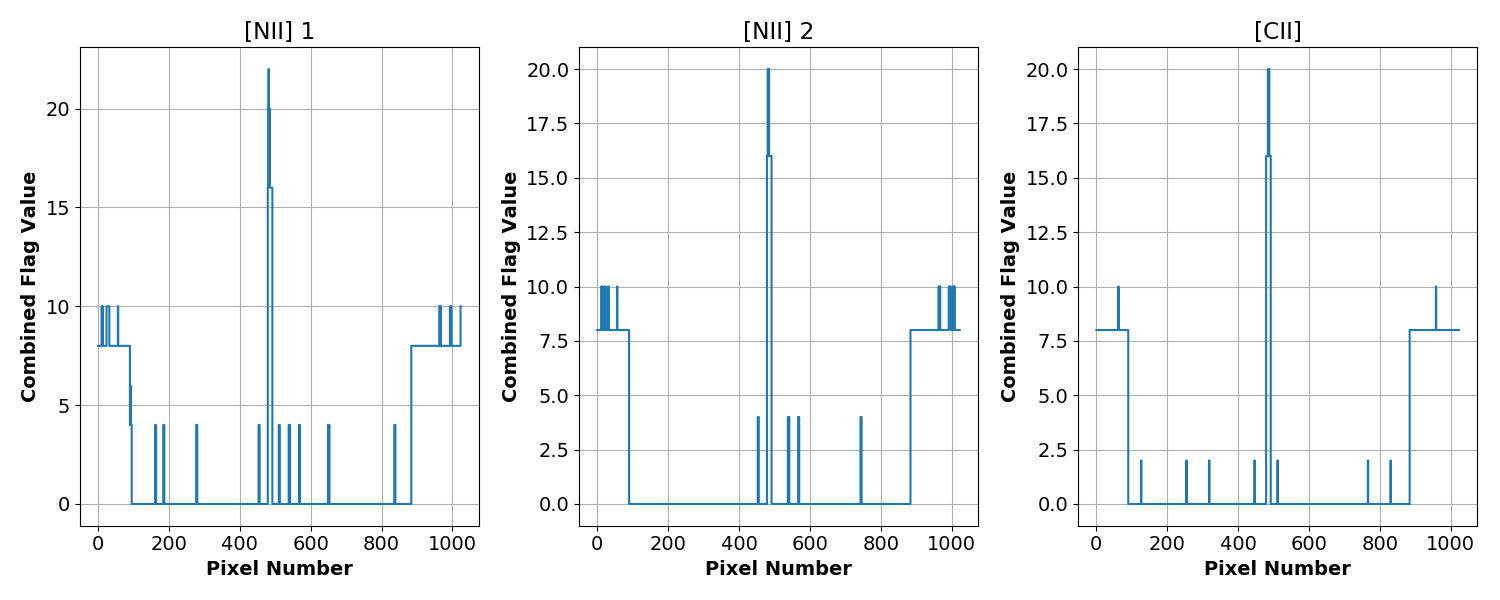

./Dataana/EtaCar_spec_mask_plot_1_level0.7vp36.pdf


<IPython.core.display.Javascript object>


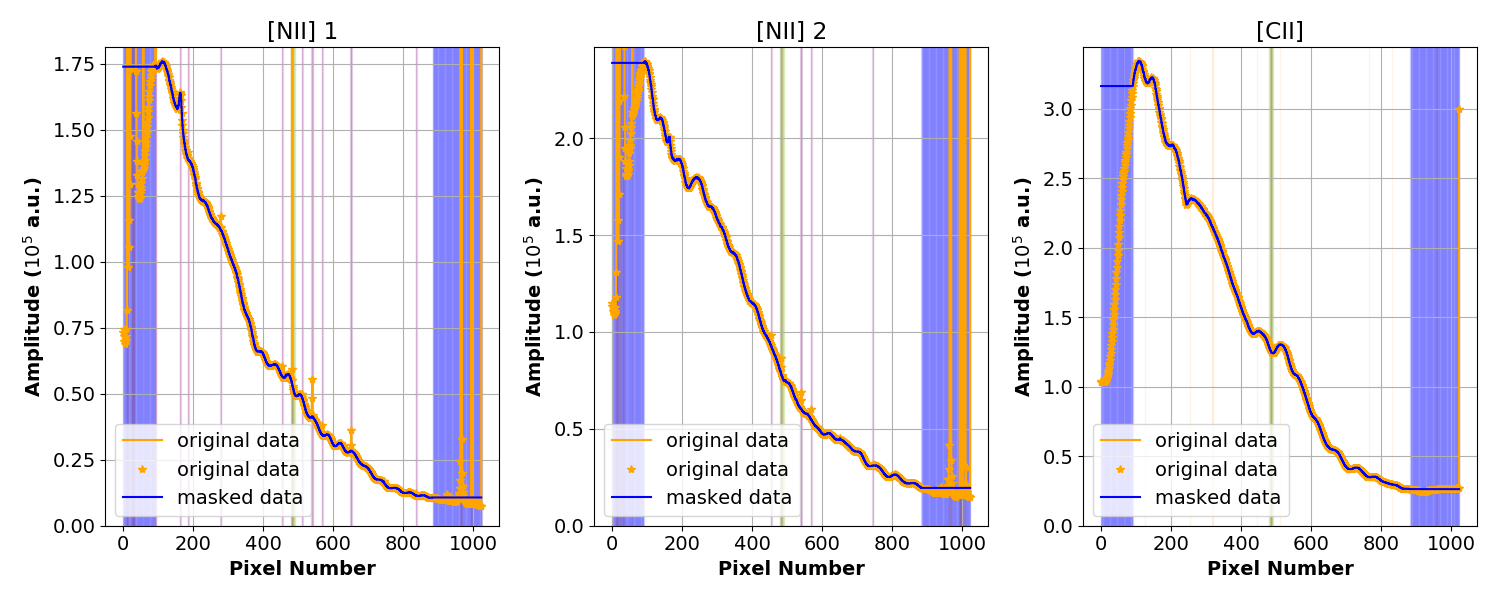

./Dataana/EtaCar_spec_mask_plot_2_level0.7vp36.pdf


<IPython.core.display.Javascript object>


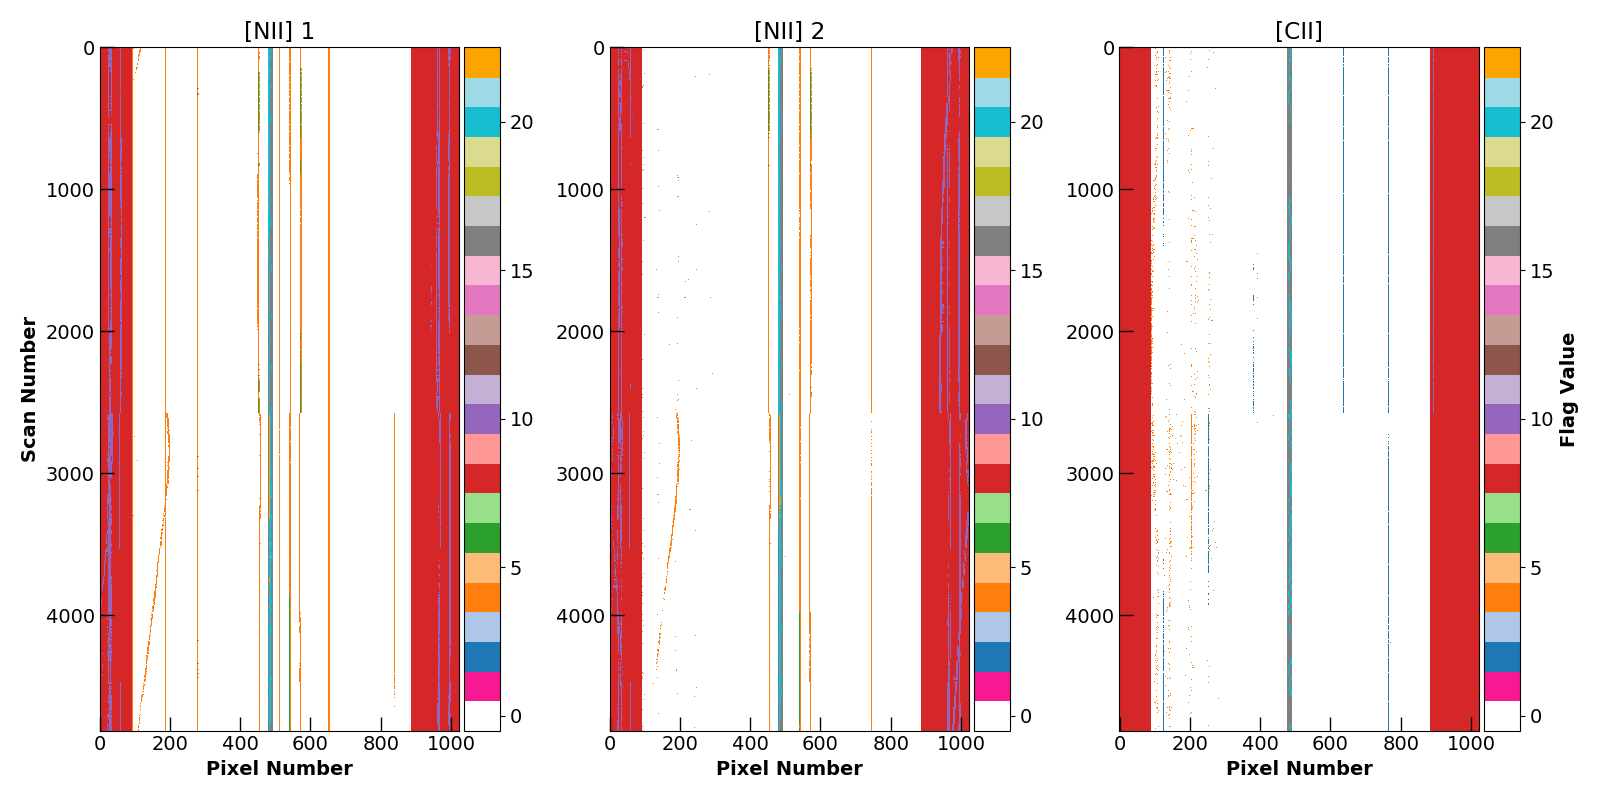

23 [[1.         1.         1.         1.        ]
 [0.96875    0.09375    0.578125   1.        ]
 [0.12156863 0.46666667 0.70588235 1.        ]
 [0.68235294 0.78039216 0.90980392 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [1.         0.73333333 0.47058824 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.59607843 0.8745098  0.54117647 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [1.         0.59607843 0.58823529 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.77254902 0.69019608 0.83529412 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.76862745 0.61176471 0.58039216 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.96862745 0.71372549 0.82352941 1.        ]
 [0.49803922 0.49803922 0.49803922 1.        ]
 [0.78039216 0.78039216 0.78039216 1.        ]
 [0.7372549  0.74117647 0.13333333 1.        ]
 [0.85882353 0.85882353 0.55294118 1.        ]
 [0.09019608 0.74509804 0.81176471 1.        ]
 [0.619607

In [3]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rc("font", size=14)

add = ''

print('data: ', np.nanmin(idat[:,lin,:]), np.nanmax(idat[:,lin,:]))
print('n_files: ', n_files)
print('cnt: ', cnt)
print()
print('olevel: ', olevel)
print(type(olevel))
print('scan: ', scan, ifil[scan])
print()
    

# ldat = np.squeeze(idat[:,lin,:].copy())
# lmsk = np.squeeze(imsk[:,lin,:].copy())
# lvv = np.squeeze(ivv[:,lin,:])/1000.
# lcd = np.squeeze(icd[:,lin])/1000.
ldat = np.squeeze(idat.copy())
lmsk = np.squeeze(imsk.copy())
lvv = np.squeeze(ivv)/1000.
lcd = np.squeeze(icd)/1000.
lcv = icv.copy()/1000.
# lcp = np.squeeze(icp[:,lin])
# print('lcd: ', lcd.min(), lcd.mean(), lcd.max())
# print('lcv: ', lcv.min(), lcv.mean(), lcv.max())
# print('lcp: ', lcp.min(), lcp.mean(), lcp.max())

print()
print('max mask val: ', lmsk.max())
print()

fig1 = plt.figure(figsize=(15,6))

for k in range(3):
    sp11 = plt.subplot(1,3,k+1)
    pl11 = plt.plot(lmsk[scan,k,:], linestyle='steps-post')
    sp11.title.set_text(clines[k])
    plt.grid()   
    plt.xlabel(r'Pixel Number', size=14, fontweight='bold')
    plt.ylabel(r'Combined Flag Value', size=14, fontweight='bold')

fig1.tight_layout() # Or equivalently,  "plt.tight_layout()"

pdf_file1 = os.path.join(sto2_opath,'EtaCar_spec_mask_plot_1_%s%s.pdf'%(olevel, add))
plt.savefig(pdf_file1,format='PDF',orientation='portrait',bbox_inches='tight')
print(pdf_file1)


fig2 = plt.figure(figsize=(15,6))

for k in range(3):
    sp21 = plt.subplot(1,3,k+1)
    sp21.title.set_text(clines[k])
    pl21 = plt.plot(odat[k,:]/10E5, linestyle='steps-post', color='orange', label='original data')
    pl21 = plt.plot(odat[k,:]/10E5, '*', color='orange', label='original data')
    pl21 = plt.plot(ldat[scan,k,:]/10E5, linestyle='steps-post', color='blue', label='masked data')
    plt.ylim((0, max(ldat[scan,k,:])*1.03/10E5))
    plotMask(lmsk[scan,k,:],(0, max(ldat[scan,k,:])), alp=0.1)
    plt.legend()
    plt.grid()
    plt.xlabel(r'Pixel Number', size=14, fontweight='bold')
    plt.ylabel(r'Amplitude ($10^5$ a.u.)', size=14, fontweight='bold')

fig2.tight_layout() # Or equivalently,  "plt.tight_layout()"

pdf_file2 = os.path.join(sto2_opath,'EtaCar_spec_mask_plot_2_%s%s.pdf'%(olevel, add))
plt.savefig(pdf_file2,format='PDF',orientation='portrait',bbox_inches='tight')
print(pdf_file2)




fig3 = plt.figure(figsize=(16,8))

# use a discrete colorbar
# cpool = [ '#ffffff', '#bd2309', '#bbb12d', '#1480fa', '#14fa2f',
#           '#2edfea', '#ea2ec4', '#ea2e40', '#8086d9', '#577a4d',
#           '#2e46c0', '#f59422', '#219774', '#cdcdcd', '#faf214' ]
# cmap_flag = col.ListedColormap(cpool[0:nmax], 'flagd')
# cm.register_cmap(cmap=cmap_flag)
# alternate colorbar

nmax = int(np.round(lmsk.max(),0)+1)
cmap = plt.get_cmap('tab20', 20)
vals = np.ones((24, 4))
vals[2:22,:] = cmap.colors
vals[-1,:] = [0, 0, 0., 1.]
vals[1,:] = [248/256, 24/256, 148/256, 1.]  # pink
vals[22,:] = [255/256, 165/256, 0/256, 1.]  # orange
vals[23,:] = [184/256, 134/256, 11/256, 1.]  # orange
vals[ 0,:] = [1, 1, 1., 1.]
if nmax<=24: vals = vals[0:nmax,:]
cmp_flag = ListedColormap(vals)
print(nmax, cmp_flag.colors)


for k in range(3):
    sp3 = plt.subplot(1,3,k+1)
    sp3.title.set_text(clines[k])

    im3 = plt.imshow(np.squeeze(lmsk[:,k,:]), vmin=-0.5, vmax=lmsk.max()+0.5, aspect='auto', cmap=cmp_flag)
    
    # plt.grid()
    plt.xlabel(r'Pixel Number', size=14, fontweight='bold')
    if k==0: plt.ylabel('Scan Number', size=14, fontweight='bold')

    ax3 = plt.gca()
    divider = make_axes_locatable(ax3)
    cax3 = divider.append_axes("right", size="10%", pad=0.05)

    cb3 = plt.colorbar(im3, cax=cax3, pad = 0.03)
    if k==2: cb3.set_label('Flag Value', fontweight='bold', size=14)
    cb3.ax.tick_params(labelsize=14)

    ax3.tick_params('x', length=10, width=1, which='major', tickdir='in', labelsize=14)
    ax3.tick_params('y', length=10, width=1, which='major', tickdir='in', labelsize=14)

fig3.tight_layout() # Or equivalently,  "plt.tight_layout()"

pdf_file3 = os.path.join(sto2_opath,'EtaCar_spec_mask_plot_3_%s%s.pdf'%(olevel, add))
plt.savefig(pdf_file3,format='PDF',orientation='portrait',bbox_inches='tight')
print(pdf_file3)



